In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/meta1"):
    df = pd.read_csv(f"../logs/experiment/meta1/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
title_dict = {
    "r": "ReLU",
    "l": "LReLU",
    "e": "ELU",
    "s": "SELU",
}
for act in ["r", "l", "e", "s"]:
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        if not df["Value"].isnull().values.any():
            if names[i][0] == act:
                if names[i][-2] == "s":
                    ax.plot(df["Step"], df["Value"], label=names[i], color=f"C{i}")
                    if np.array(df["Step"])[-1] > 600:
                        axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{i}")
            
    plt.title(f"Validation Loss for first Grid Search: {title_dict[act]} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 1)
    plt.xlim(0, 950)
    plt.legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    meta = names[i].split("-")
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/pacs_meta2"):
    df = pd.read_csv(f"../logs/experiment/pacs_meta2/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
for depth in [1, 2]:
    k=0
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] != "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] == "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
            
    plt.title(f"Validation Loss for second Grid Search: Depth {depth} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 0.2)
    plt.xlim(0, 20000)
    plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
k=0
fig, ax = plt.subplots(figsize=(12, 8))
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for i, df in enumerate(dfs):
    name = names[i].split("-")
    if name[0] == "1024":
        label = name[0] + ",  "
        if name[0] != "1024":
            label += "  "
        label += name[1] + ",  "
        for j in range(2,8):
            label += name[j] + "-"
        ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
        if np.array(df["Step"])[-1] > 600:
            axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
            axins.set_ylim(0.05, 0.075)
            axins.set_xlim(14500, 19000)
        k+=1
        
plt.title(f"Validation Loss for second Grid Search: Latent Size 1024 Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20000)
plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
for i, df in enumerate(dfs):
    # df.dropna(inplace=True)
    meta = names[i].split("-")
    depth = meta[1]
    latent_size = meta[0]
    out_channels = meta[2]
    for j in range(3,7):
        out_channels += ", " + meta[j]
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {depth} & {latent_size} & {out_channels}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

In [ ]:
# ERM
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
fig, ax = plt.subplots(figsize=(12, 8))
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
k = 0
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.0":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.01":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.1":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
        
plt.title(f"Validation Loss for Classifier Grid Search: ERM Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
# plt.ylim(0, 1)
# plt.xlim(0, 950)
plt.legend(bbox_to_anchor=(1.4,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
for act in ["relu", "selu", "elu"]:
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
    for j in range(2):
        axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
        k = 0
        for i, df in enumerate(dfs):
            name = names[i].split("_")
            if name[3] == "CNN" and name[6] == act:
                out_cs = name[7].split("-")
                out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
                if name[5] == str(j+1):
                    if name[4] == "128":
                        spacer = ""
                    else:
                        spacer = "  "
                    label = f"{name[4]}, {spacer}{out_c}"
                    label += " " * abs(23 - len(label))
                    axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                    # if np.array(df["Value"])[-1] < 0.2:
                        # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                    axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                    k += 1
        if act == "relu":
            top = 1.3
        elif act == "elu":
            top = 0.275
        elif act == "selu":
            top = 0.275
        axes[j].set_ylim(0, top)
        axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
for j in range(2):
    axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
    k = 0
    for i, df in enumerate(dfs):
        name = names[i].split("_")
        if name[3] == "CNN" and name[6] == act:
            out_cs = name[7].split("-")
            out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
            if name[5] == str(j+1):
                if name[4] == "128":
                    spacer = ""
                else:
                    spacer = "  "
                label = f"{name[4]}, {spacer}{out_c}"
                label += " " * abs(23 - len(label))
                axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                # if np.array(df["Value"])[-1] < 0.2:
                    # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                k += 1
    if act == "relu":
        top = 1.3
    elif act == "elu":
        top = 0.275
    elif act == "selu":
        top = 0.275
    axes[j].set_ylim(0, top)
    axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
scores = np.zeros(len(dfs))
N = 2
for i, df in enumerate(dfs):
    #df.dropna(inplace=True)
    meta = names[i].split("-")
    # score = np.mean(np.array(df['Value'])[-N:])
    score = np.min(np.array(df["Value"]))
    # print(i, score)
    scores[i] = score
    # print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")
sort_inds = np.argsort(scores)
scores = scores[sort_inds]
names_sorted = []
for ind in sort_inds:
    names_sorted.append(names[ind])

print(f" Minimal Validation Loss & Architecture & Weight Decay")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "ERM":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {linearity_dict[name[4]]} & {name[5]}")


print(f" Minimal Validation Loss & Latent Size & Depth & Activation & Output Channels")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "CNN":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {name[4]} & {name[5]} & {activation_dict[name[6]]} & {out_c}")


In [1]:
import umap

In [15]:
import torch
latent_data = torch.randn(size=(500, 1024))
reducer = umap.UMAP(random_state=17)
reducer.fit(latent_data)
embedding = reducer.embedding_

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:

new_lat = torch.randn_like(latent_data)
normal_embedding = reducer.transform(new_lat)

In [18]:

compare_embedding = np.concatenate((embedding, normal_embedding), axis=0)

In [19]:

compare_colors = np.concatenate((np.zeros(normal_embedding.shape[0], dtype=np.int32), np.ones(normal_embedding.shape[0], dtype=np.int32)), axis=0)

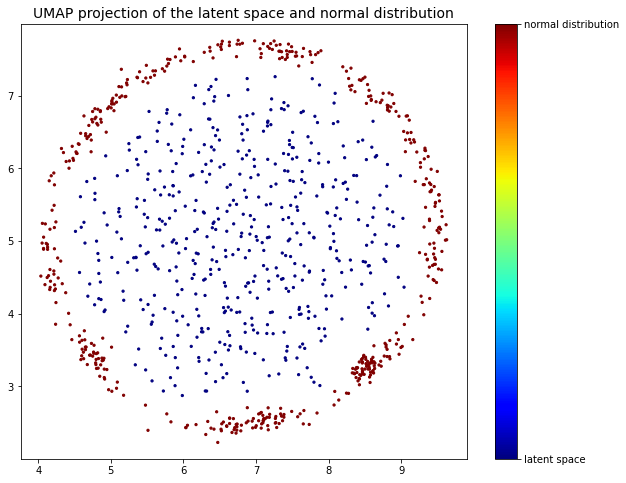

In [26]:

plt.figure(figsize=(10, 8))
plt.scatter(compare_embedding[:, 0], compare_embedding[:, 1], c=compare_colors, cmap="jet", s=5)
plt.gca().set_aspect("equal", "datalim")
cbar = plt.colorbar(boundaries=np.arange(2+1)-0.5)
cbar.set_ticks(np.arange(2))
cbar.ax.set_yticklabels(["latent space", "normal distribution"])
plt.title("UMAP projection of the latent space and normal distribution", fontsize=14)
plt.show()